In [12]:
import importlib
 
if importlib.util.find_spec('fsspec') is None:
  !pip install fsspec
if importlib.util.find_spec('s3fs') is None:
  !pip install s3fs
  
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import matplotlib.pyplot as plt

# Parameters

In [13]:
nb_paths = 100
nb_paths_on_plot = 10

initial_price = 40.0

start_date = '2019-09-30'
end_date = '2021-09-30'

# Read data from file

In [14]:
df_GE = pd.read_excel('https://lfspf.s3.eu-central-1.amazonaws.com/GE.xlsx')
df_GE.set_index('date', inplace=True)
df_GE.head()

,GE
date,
2007-10-23,40.48
2007-10-24,40.23
2007-10-25,40.16
2007-10-26,40.38
2007-10-29,40.56


# Plot historical price

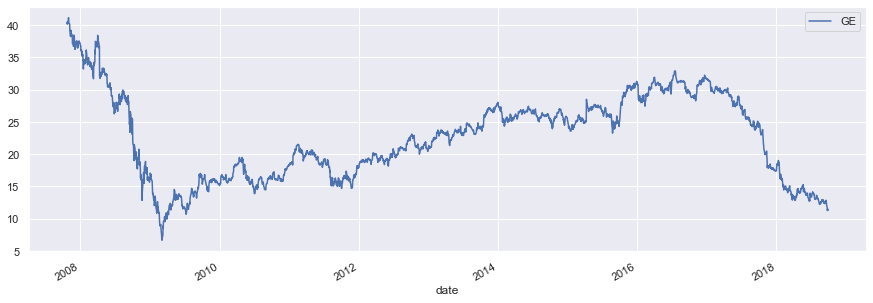

In [15]:
df_GE.plot(figsize=(15, 5));

# Calculate historical returns

In [16]:
df_GE['Returns'] = df_GE['GE'].pct_change()
df_GE.head()

,GE,Returns
date,,
2007-10-23,40.48,NaN
2007-10-24,40.23,-0.006176
2007-10-25,40.16,-0.001740
2007-10-26,40.38,0.005478
2007-10-29,40.56,0.004458


# Randomly sample new returns

In [17]:
dates = pd.bdate_range(start_date, end_date)
nb_dates = len(dates)
dates

DatetimeIndex(['2019-09-30', '2019-10-01', '2019-10-02', '2019-10-03',
               '2019-10-04', '2019-10-07', '2019-10-08', '2019-10-09',
               '2019-10-10', '2019-10-11',
               ...
               '2021-09-17', '2021-09-20', '2021-09-21', '2021-09-22',
               '2021-09-23', '2021-09-24', '2021-09-27', '2021-09-28',
               '2021-09-29', '2021-09-30'],
              dtype='datetime64[ns]', length=524, freq='B')

In [18]:
sample_source = df_GE['Returns'].values[1:]
sampled_returns = np.random.choice(sample_source, size=(nb_dates-1, nb_paths))
df_returns = pd.DataFrame(sampled_returns, index=dates[1:])
df_returns.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2019-10-01,0.013722,0.010259,0.007133,-0.012666,-0.025687,-0.003469,0.022550,0.013057,0.014408,-0.003671,...,-0.001211,-0.005736,0.004810,0.023882,0.001886,-0.008006,-0.000541,0.005613,-0.078850,0.030372
2019-10-02,-0.072596,-0.026061,-0.021306,0.001886,-0.005451,0.046353,0.039314,0.000000,-0.008333,-0.000473,...,-0.026061,0.003450,0.007466,0.016675,-0.018908,-0.016797,-0.004854,-0.002301,-0.004866,-0.025332
2019-10-03,-0.056287,-0.021150,-0.017743,-0.006901,0.019760,-0.013514,0.010067,0.000000,-0.013072,-0.012000,...,0.013320,-0.038489,0.003145,-0.020598,0.000000,-0.007246,-0.002375,0.015139,0.004294,0.019751
2019-10-04,-0.000657,0.016896,0.029529,-0.030442,0.015798,0.001552,0.035714,0.000000,-0.002090,-0.001497,...,0.012418,-0.004522,0.045113,-0.008035,0.004389,-0.021558,0.018526,0.021754,0.000000,-0.004416
2019-10-07,0.011900,-0.025834,-0.002236,0.017857,0.010406,-0.005330,0.004488,-0.007346,0.003086,0.001485,...,0.030591,0.016234,0.032419,-0.018462,-0.042314,0.004685,-0.004950,0.000000,-0.006979,0.003178


# Transform sampled returns to prices

In [19]:
df_price = (1 + df_returns).cumprod(axis=0)
df_price.loc[dates[0], :] = 1.0
df_price *= initial_price
df_price.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2019-10-01,40.548885,40.410341,40.285307,39.493366,38.972521,39.861243,40.901995,40.522273,40.576307,39.853157,...,39.951574,39.770554,40.192385,40.955297,40.075424,39.679767,39.978367,40.224539,36.846011,41.214900
2019-10-02,37.605179,39.357223,39.426982,39.567834,38.760092,41.708935,42.510007,40.522273,40.238171,39.834305,...,38.910412,39.907753,40.492446,41.638210,39.317666,39.013280,39.784297,40.131998,36.666712,40.170824
2019-10-03,35.488513,38.524830,38.727447,39.294782,39.526010,41.145300,42.937961,40.522273,39.712182,39.356293,...,39.428711,38.371725,40.619781,40.780546,39.317666,38.730575,39.689797,40.739547,36.824155,40.964236
2019-10-04,35.465181,39.175750,39.871017,38.098569,40.150434,41.209171,44.471459,40.522273,39.629189,39.297377,...,39.918330,38.198210,42.452252,40.452891,39.490220,37.895633,40.425072,41.625791,36.824155,40.783322
2019-10-07,35.887224,38.163675,39.781860,38.778900,40.568232,40.989535,44.671032,40.224589,39.751482,39.355747,...,41.139461,38.818310,43.828509,39.706068,37.819229,38.073189,40.224947,41.625791,36.567142,40.912947


# Plot some of the sampled paths

<AxesSubplot:>

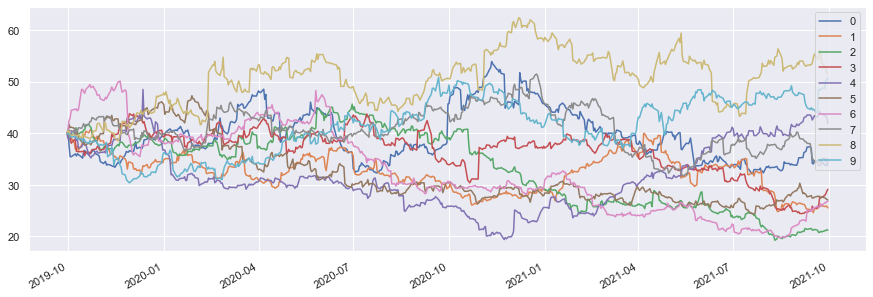

In [20]:
df_price.iloc[:, 0:nb_paths_on_plot].plot(figsize=(15,5))